In [57]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from keras.utils.np_utils import to_categorical
from keras.layers import Dense
from keras.models import Sequential
from keras.callbacks import EarlyStopping
from keras.optimizers import SGD
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

In [30]:


(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

# Create the model: model
model = Sequential()

# Add the first hidden layer
model.add(Dense(512, activation='relu', input_shape=(28*28,)))

# Add the second hidden layer
model.add(Dense(50, activation='relu'))

# Add the output layer
model.add(Dense(10, activation='softmax'))

# Compile the model
#model.compile(optimizer='adam',loss='categorical_crossentropy',        metrics=['accuracy'])
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',        metrics=['acc'])

print("train count",X_train.shape[0],"test count",X_test.shape[0])

# Fit the model
trainX = X_train.reshape((X_train.shape[0], 28*28)) 
trainX = trainX.astype('float')/255
testX = X_test.reshape((X_test.shape[0], 28*28))
testX = testX.astype('float')/255



train count 60000 test count 10000


In [31]:
trainY=to_categorical(Y_train)
testY=to_categorical(Y_test)

early_stopping_monitor=EarlyStopping(patience=3)

print(trainX.shape)
history=model.fit(trainX, trainY, validation_split=0.3,callbacks=[early_stopping_monitor],epochs=3)

(60000, 784)
Train on 42000 samples, validate on 18000 samples
Epoch 1/3
42000/42000 [==============================] - 13s 314us/step - loss: 0.2336 - acc: 0.9286 - val_loss: 0.1341 - val_acc: 0.9601
Epoch 2/3
42000/42000 [==============================] - 12s 290us/step - loss: 0.0998 - acc: 0.9696 - val_loss: 0.1186 - val_acc: 0.9675
Epoch 3/3
42000/42000 [==============================] - 15s 355us/step - loss: 0.0710 - acc: 0.9792 - val_loss: 0.1157 - val_acc: 0.9735


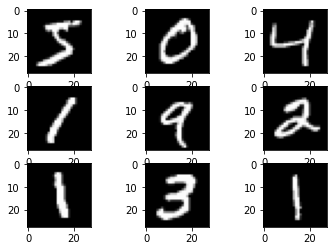

In [59]:
for i in range(9):
	# define subplot
	plt.subplot(330 + 1 + i)
	# plot raw pixel data
	plt.imshow(X_train[i], cmap=pyplot.get_cmap('gray'))

In [26]:
test_loss, test_acc = model.evaluate(x=testX,y=testY)
print("accuracy",test_acc)

10000/10000 [==============================] - 1s 75us/step
accuracy 0.9753999710083008


{'val_loss': [0.13411377621845652, 0.1186306117584916, 0.11565177440472568], 'val_acc': [0.9600555300712585, 0.9674999713897705, 0.9735000133514404], 'loss': [0.23363295057380484, 0.09975963642789672, 0.07099549514943335], 'acc': [0.92859524, 0.96959525, 0.97919047]}


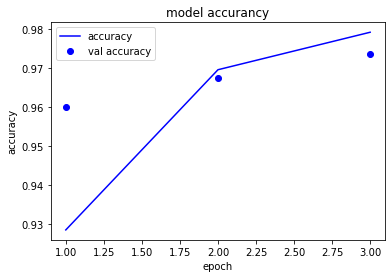

In [44]:
# summarize history for loss
hist_dict=history.history
epochs=range(1,len(hist_dict['acc'])+1)
print(hist_dict)
plt.plot(epochs,hist_dict['acc'],'b',label='accuracy')
plt.plot(epochs,hist_dict['val_acc'],'bo',label='val accuracy')
plt.title('model accurancy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(loc='upper left')
plt.show()

Predicted Number 5 Actual Number 5


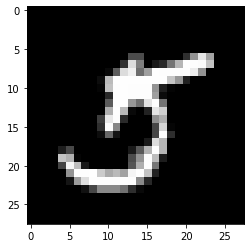

Predicted Number 4 Actual Number 4


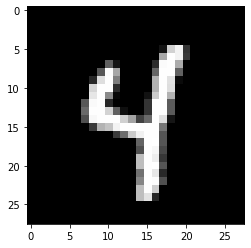

Predicted Number 8 Actual Number 8


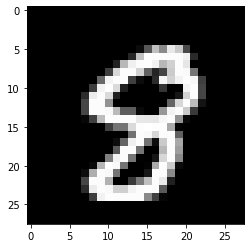

Predicted Number 8 Actual Number 8


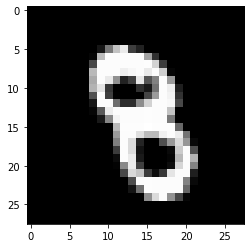

Predicted Number 6 Actual Number 6


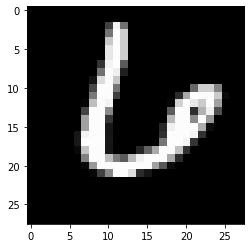

Predicted Number 4 Actual Number 4


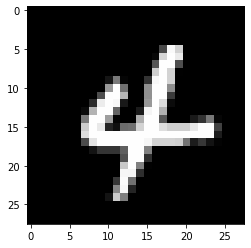

Predicted Number 3 Actual Number 3


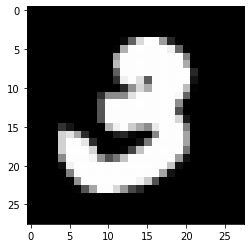

Predicted Number 4 Actual Number 4


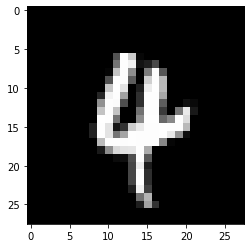

Predicted Number 2 Actual Number 2


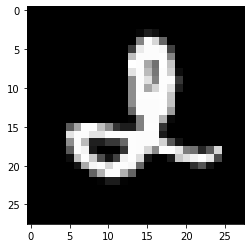

Predicted Number 1 Actual Number 1


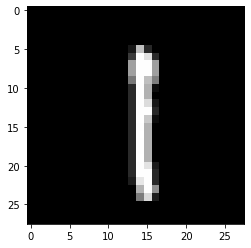

In [73]:
predictions=model.predict(testX)

index=[]

for i in range(10):
    indice=np.random.choice(len(X_test)-1)
    index.append(indice)
    
for i in index:
    pyplot.imshow(X_test[i], cmap=pyplot.get_cmap('gray'))
    print("Predicted Number",np.argmax(predictions[i]),"Actual Number",np.argmax(testY[i]))
    plt.show()